In [1]:
import numpy as np

In [2]:
from sklearn import tree
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
import matplotlib.pyplot as plt

In [4]:
def find(a,k):
    for i in a:
        if(i==k):
            return 1
    return 0

In [5]:
data=np.genfromtxt('mnist_train.csv',delimiter=',')
test=np.genfromtxt('mnist_test.csv',delimiter=',')
data_input=data[:,1:]
data_label=data[:,0]
test_input=test[:,1:]
test_label=test[:,0]

## 5-fold cross validation for max_depth parameter

In [6]:
# 5-fold on DT of sklearn CART
importance_list=[]
score_list=[]
kfold=KFold(n_splits=5, shuffle=False, random_state=None)
for train_index, cv_index in kfold.split(data_input,data_label):
    X_train,X_cv = data_input[train_index],data_input[cv_index]
    Y_train,Y_cv=data_label[train_index], data_label[cv_index]
    score=[]
    importance=[]
    for i in range(1,41):
        Dtree=tree.DecisionTreeClassifier(max_depth=i,random_state=0)
        Dtree.fit(X_train,Y_train)
        importance.append(Dtree.feature_importances_)
        score.append(Dtree.score(X_cv,Y_cv))
    importance_list.append(importance)
    score_list.append(score)

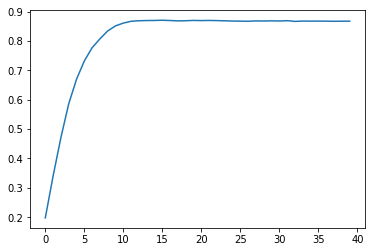

In [7]:
score_list_avg=np.array(score_list).mean(axis=0)
max_depth_index=np.arange(40)
plt.plot(max_depth_index,score_list_avg)

In [8]:
# Average importance of feature
importance_list_array=np.array(importance_list)
importance_avg=np.zeros([importance_list_array.shape[1],importance_list_array.shape[2]])
div=importance_list_array.shape[0]
for i in range(importance_list_array.shape[1]):
    sum=importance_list_array[0][i]
    for j in range (1,importance_list_array.shape[0]):
        sum=np.add(sum,importance_list_array[j][i])
    importance_avg[i]=sum/div  

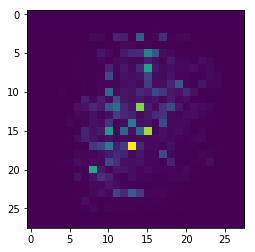

In [9]:
#averaged importance of features at max_depth=score_list_avg.max()
plt.imshow(importance_avg[score_list_avg.argmax()].reshape(28,28))

In [11]:
max_10=np.full((5,10),-1)
for  i in range(max_10.shape[0]):
    for j in range(max_10.shape[1]):
        maximum=0
        for l in range(np.size(score_list[i])):
            if(score_list[i][l]>=score_list[i][maximum] and find(max_10[i],l)==0):
                maximum=l
        max_10[i][j]=maximum

        
#printing top ten max_depth at each iteration of croos validation
for i in max_10:
    print(i)    
print('Averaged over 5 iterations most accurate max_depth =' + str(score_list_avg.argmax()) +' with average accuracy of '+str(score_list_avg.max()))

[36 14 22 20 31 30 21 34 27 19]
[12 19 15 17 16 13 21 14 20 22]
[27 19 18 31 14 29 22 13 28 15]
[15 19 16 21 23 12 18 13 24 30]
[15 31 14 21 16 39 20 23 17 18]
Averaged over 5 iterations most accurate max_depth =15 with average accuracy of 0.8705


In [12]:
#performance metric over complete Train and Test data with max_depth from top 5 of the cross validation iterations
label_name=['digit-0','digit-1','digit-2','digit-3','digit-4','digit-5','digit-6','digit-7','digit-8','digit-9']
for i in range(max_10.shape[0]):
    Dtree=tree.DecisionTreeClassifier(max_depth=max_10[i][0],random_state=0)
    Dtree.fit(data_input,data_label)
    prediction=Dtree.predict(test_input)
    print('tree max depth- '+ str(max_10[i][0]))
    print(classification_report(test_label,prediction, target_names=label_name))

tree max depth- 36
             precision    recall  f1-score   support

    digit-0       0.91      0.93      0.92       980
    digit-1       0.95      0.97      0.96      1135
    digit-2       0.86      0.85      0.85      1032
    digit-3       0.83      0.86      0.84      1010
    digit-4       0.87      0.87      0.87       982
    digit-5       0.84      0.84      0.84       892
    digit-6       0.90      0.88      0.89       958
    digit-7       0.91      0.91      0.91      1028
    digit-8       0.83      0.81      0.82       974
    digit-9       0.86      0.85      0.86      1009

avg / total       0.88      0.88      0.88     10000

tree max depth- 12
             precision    recall  f1-score   support

    digit-0       0.92      0.94      0.93       980
    digit-1       0.95      0.96      0.96      1135
    digit-2       0.87      0.85      0.86      1032
    digit-3       0.82      0.86      0.84      1010
    digit-4       0.88      0.85      0.87       982
    

## Note- above shows that some classes are easy to classify

In [23]:
# 5-fold on DT of sklearn CART
# importance_list_5fold=[]
# score_list_5fold=[]
# kfold=KFold(n_splits=5, shuffle=False, random_state=None)
# for train_index, cv_index in kfold.split(data_input,data_label):
#     X_train,X_cv = data_input[train_index],data_input[cv_index]
#     Y_train,Y_cv=data_label[train_index], data_label[cv_index]
#     score=[]
#     for i in range(1,41):
#         Dtree=tree.DecisionTreeClassifier(max_depth=i,random_state=0)
#         Dtree.fit(X_train,Y_train)
#         importance=Dtree.feature_importances_
#         score.append(Dtree.score(X_cv,Y_cv))
#         importance_list_5fold.append(importance)
#     score_list_5fold.append(score)